In [1]:
!pip install transformers

     |████████████████████████████████| 2.0MB 6.4MB/s 
     |████████████████████████████████| 3.2MB 23.7MB/s 
     |████████████████████████████████| 890kB 44.4MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=07ce638e03c7383be3628ae9f2241384c1a3df6d86a46d1d1459d11754a56b3c
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from transformers import *
import json
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
import re

from math import pi
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Sentiment Analysis에 필요한 패키지 Import 


In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%config InlineBackend.figure_format = 'retina'

!apt --qq -y install fonts-NanumBarunGothic

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)

# 그래프에 retina display 적용

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')  
fm._rebuild()

E: Command line option --qq is not understood in combination with the other options


구글 드라이브와 Colab을 연동합니다.

In [4]:
import os
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [5]:
os.listdir('gdrive/My Drive/pytest')

['Sentiment Analysis Dataset.csv',
 'iris.csv',
 'test.csv',
 'ratings_morphed.txt',
 '김소월시.txt',
 '윤동주시.txt',
 'ratings.txt',
 'wiki_test.txt',
 'negative.txt',
 'positive.txt',
 'ratings_small.txt',
 'kor-eng',
 '네이버뉴스-생활문화_다중',
 'word2vec',
 'aclImdb_v1_small',
 'similarity',
 'fra-eng',
 'rathings_morphed.txt',
 'rathings.txt',
 'stopwords-ko.txt',
 '크롤링 20000개.csv',
 '학대별 라벨.xlsx',
 'bert',
 '위험별 척도 유형 200개씩.xlsx',
 'Child_Abuser.csv',
 '위험 척도 유형별 (1000개) .csv',
 '위험 척도 유형 (해당없음 제거) .csv',
 '학대별 라벨-중복제거.xlsx',
 '위험 척도 유형 (해당없음 제거) .gsheet',
 '학대별 라벨_500개씩.csv',
 '학대유형척도.xlsx',
 'real_학대유형척도 (1).xlsx',
 'real_학대유형척도.xlsx',
 'Child_Abuser_score.csv',
 'Replace_Child.csv',
 '학대심각성 및 지속성_6분류_최종.xlsx']

In [ ]:
# !apt-get update
# !apt-get install g++ openjdk-8-jdk

In [ ]:
# !pip install JPype1==0.7.4
# !pip install rhinoMorph

In [ ]:
# import rhinoMorph
# rn = rhinoMorph.startRhino()

In [6]:
df = pd.read_excel('gdrive/My Drive/pytest/학대심각성 및 지속성_6분류_최종.xlsx')
# 지정된 구글드라이브의 파일을 불러오기 

In [7]:
df = df.drop(['번호'], axis = 1)

In [8]:
df['Label'].unique()

array([1, 2, 3, 4, 5, 6])

In [9]:
df

,내용,Label
0,친부에게 정당한 이유 없이 뺨을 맞아서 고막에 천공이 생겨 고막패치술을 받았습니다....,1
1,전 중학생이고 친아빠 가정폭력 신고로 신고하고싶어요참을대로 참았고 아빠는 술먹으면 ...,1
2,저는 중 3 여학생입니다.제가 처음 맞은 건...4살때였어요.말버릇을 고치라고 아...,1
3,. 저는 9살 남학생입니다. 저희 아빠가 술을 먹고 온몸에 멍이 들 정도로 때리시...,1
4,몸을 직접적으로 때리거나 그러는거 없어도 신고가 되나요? 녹음한게 7개는 모아놨는데...,1
...,...,...
1503,이혼소송중 남편한테 아동학대 부분고소를 당했는데요 아이를 만나 이야기를... 그런말...,6
1504,오후 1시경 맞은편에서 걸어오는 여성2명(미성년자로 추정)을 보고 근접한 거리에서 ...,6
1505,성범죄 경력 및 아동학대관련범죄 전력 조회 동의서를 이번년도에 작성했으면 그 작성한...,6
1506,"성추행,아동학대로 재판중입니다.피의자가 말도없이 1000만원을제 계좌로 보냈습니다....",6


In [ ]:
# !set -x \
# && pip install konlpy \
# && curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

+ pip install konlpy
     |████████████████████████████████| 19.4MB 1.5MB/s 
     |████████████████████████████████| 460kB 55.8MB/s 
     |████████████████████████████████| 92kB 10.0MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
+ curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh
+ bash -x
+ mecab_dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic
+ set -e
++ uname
+ os=Linux
+ [[ ! Linux == \L\i\n\u\x ]]
+ hash sudo
+ sudo=sudo
+ python=python3
+ hash pyenv
+ at_user_site=
++ check_python_site_location_is_writable
++ python3 -
+ [[ 1 == \0 ]]
+ hash automake
+ echo 'Installing automake (A dependency for mecab-ko)'
Installing automake (A dependency for mecab-ko)
+ install_automake
+ '[' Linux == Linux ']'
++ grep -Ei 'debian|buntu|mint' /etc/lsb-release /etc/os-release
+ '[' '/etc/lsb-release:DISTRIB_ID=Ubuntu
/etc/lsb-release:DISTRIB_DESCRIPTION="Ubuntu 18.04.5

In [ ]:
# import konlpy
# konlpy.tag.Mecab().morphs('아버지가방에들어가신다')

['아버지', '가', '방', '에', '들어가', '신다']

In [10]:
def text_cleaning(doc):
    
    doc = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", doc)
        
    return doc

In [11]:
def text_tokenizing(doc):
  return [word for word in kkma.morphs(doc) if word not in SW and len(word) > 1]

In [ ]:
# def text_tokenizing(doc):
#     return [word for word in rhinoMorph.onlyMorph_list(rn,doc, pos = ['NNG', 'NNP','NP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi = False) if word not in SW and len(word) > 1]

#     # for word in doc:
#     #   word = word.split()
#     #   for words in word:
#     #     if words not in SW and len(words) > 1:
      
#     #       return words

In [12]:
def define_stopwords(path):
    
    SW = set() 
    #집합형태로 만들어줘야 중복을 제외하고 출력해줌
    #불용어들을 추가할려면 SW.add()이렇게 넣어주면 됨
    
    with open(path, encoding = 'cp949') as f:
        for word in f:
            SW.add(word)
            
    return SW

SW = define_stopwords('gdrive/My Drive/pytest/stopwords-ko.txt')

In [13]:
a = []
for i in SW:
  a.append(i.replace("\n",""))

In [14]:
SW = set()

In [15]:
for i in a:
  SW.add(i)

In [16]:
SW

{'',
 'ㅋ',
 'ㅋㅋ',
 'ㅋㅋㅋ',
 'ㅎ',
 'ㅎㅎ',
 'ㅎㅎㅎ',
 'ㅠ',
 'ㅠㅠ',
 'ㅠㅠㅠ',
 'ㅡ',
 'ㅡㅡ',
 'ㅡㅡㅡ',
 '가',
 '가까스로',
 '가령',
 '가지',
 '각',
 '각각',
 '각자',
 '각종',
 '갖고말하자면',
 '같다',
 '같이',
 '개의치않고',
 '거니와',
 '거바',
 '거의',
 '것',
 '것과 같이',
 '것들',
 '게다가',
 '겨우',
 '견지에서',
 '결과에 이르다',
 '결국',
 '결론을 낼 수 있다',
 '겸사겸사',
 '고려하면',
 '고로',
 '곧',
 '공동으로',
 '과',
 '과연',
 '관계가 있다',
 '관계없이',
 '관련이 있다',
 '관하여',
 '관한',
 '관해서는',
 '구',
 '구체적으로',
 '그',
 '그것',
 '그들',
 '그때',
 '그래',
 '그래도',
 '그래서',
 '그러',
 '그러나',
 '그러니',
 '그러니까',
 '그러면',
 '그러므로',
 '그러한즉',
 '그런 까닭에',
 '그런데',
 '그런즉',
 '그럼',
 '그럼에도 불구하고',
 '그렇게',
 '그렇게 함으로써',
 '그렇지',
 '그렇지 않다면',
 '그렇지 않으면',
 '그렇지만',
 '그렇지않으면',
 '그리',
 '그리고',
 '그리하',
 '그리하여',
 '그만이다',
 '그에 따르는',
 '그위에',
 '그저',
 '그중에서',
 '그치지 않다',
 '근거로',
 '근거하여',
 '근데',
 '기대여',
 '기점으로',
 '기준으로',
 '기타',
 '까닭으로',
 '까악',
 '까지',
 '까지 미치다',
 '까지도',
 '끙끙',
 '끼익',
 '나',
 '나머지는',
 '나오',
 '남들',
 '남짓',
 '내공',
 '너',
 '너무',
 '너희',
 '너희들',
 '네',
 '넷',
 '논하지 않다',
 '누가 알겠는가',
 '누구',
 '다니',
 '다른',
 '다른 방면으로',
 '다만',
 '다섯',
 '다소',
 '다수

In [17]:
list1 = df.values.tolist()

In [ ]:
# Senti = []
# for line in list1:
#   Senti.append(line[2])

In [ ]:
# Senti = pd.DataFrame(Senti)

# Senti.rename(columns = { 0 : 'Label'}, inplace = True)

In [ ]:
# labels = Senti['Label']

# classes = sorted(labels.unique())

In [ ]:
# label_to_cat = dict()

# for i in range(len(classes)):
#   dummy = np.zeros((len(classes),), dtype = 'int8')
#   dummy[i] = 1
#   label_to_cat[classes[i]] = dummy

# label_to_cat

In [ ]:
# y = np.array([label_to_cat[label] for label in Senti.Label])

In [20]:
# from konlpy.tag import Mecab
# from konlpy.tag import Kkma
# from konlpy.tag import Komoran
# from konlpy.tag import Okt
# mecab = Mecab()
# kkma = Kkma()
# komoran = Komoran()
# okt = Okt()
a = []
for line in list1:
  if text_cleaning(str(line[0])):
    a.append([text_cleaning(str(line[0])), line[1]])

In [21]:
a

[['친부에게 정당한 이유 없이 뺨을 맞아서 고막에 천공이 생겨 고막패치술을 받았습니다 어머니는 협의이혼을 생각 중이신데 미성년자인 동생이 있어서 개월 간 숙려기간을 가져야 한다고 알고 있습니다 협의이혼 시 개월의 숙려기간 동안 친부와 따로 살도록 할 수 있나요 가정폭력에 대한 증거가 고막천공으로 치료받았다는 진단서밖에 없는데 신고를 해서 접근금지 처분을 내릴 수 있나요 만약 친부가 이혼에 반대하면 진단서로 가정폭력했다는 사실을 증명해서 이혼소송을 걸 수 있나요 향후 미성년자인 동생의 양육권 분쟁에서 제가 당한 가정폭력을 근거로 친모가 양육권을 가져갈 수 있도록 할 수 있나요 위 절차에 필요한 진단서는 치료를 받았던 의원에 가서 뗄 수 있나요',
  1],
 ['전 중학생이고 친아빠 가정폭력 신고로 신고하고싶어요참을대로 참았고 아빠는 술먹으면 제 물건을 집어던지면서 욕하고 폭력 휘두르시고저번에는 저한테 그릇을 던지고 욕하고 다 치우라고 했어요 얼마전에는 숟가락을 던지고 욕하고 오늘은 왜 라고 말하고 눈이 자기 마음에 안든다고 숟가락을 던지고 제 머리채를 잡고 제 귀를 때렸어요 계속 때릴라하는거는 엄마가 막아서 덜 맞았어요 엄마가 그만하라하면 아빠는 오히려 더 화내고 욕을 해요 이혼 얘기도 나오고 집을 안나가면 집을 불태워버린다하고 이혼하고 지금 살고있는 집도 팔거고 카드도 다 달라하고 재산도 반으로 분할 한다고 말했어요 엄마랑 얘기하다가 너무 서러워서 심하게 울었는데 욕을 섞어서 시끄럽다고 한 번만 더 울면 진짜 머리채잡고 쫓아낼거라고 나가 뒤져 나가 뒤져를 계속 반복했어요 이혼할거라고 난리 피우면서 이거 다 너 때문이야 라고 계속 죄책감 주고요 이혼 하면 돈도 없고 집도 없고 학원도 못다녀요 엄마도 힘들고요 사과 안할라했는데 엄마가 너무 힘들어보여서 어쩔수없이 상황설명 까지하고 오해 풀고 잘지내볼라했어요 아빠랑 말은 당연히 안통했고요 풀려는 부분도 응응 내가 잘못했어 거리면서 넘기다가 욕하지말라해도 계속 욕을 섞어서 말하고 해명할라해도 말을 끊었어요 제 폰도

In [22]:
Senti = []
for line in a:
  Senti.append(line[1])

In [23]:
Senti = pd.DataFrame(Senti)

Senti.rename(columns = { 0 : 'Label'}, inplace = True)

In [24]:
labels = Senti['Label']

classes = sorted(labels.unique())

In [25]:
label_to_cat = dict()

for i in range(len(classes)):
  dummy = np.zeros((len(classes),), dtype = 'int8')
  dummy[i] = 1
  label_to_cat[classes[i]] = dummy

label_to_cat

{1: array([1, 0, 0, 0, 0, 0], dtype=int8),
 2: array([0, 1, 0, 0, 0, 0], dtype=int8),
 3: array([0, 0, 1, 0, 0, 0], dtype=int8),
 4: array([0, 0, 0, 1, 0, 0], dtype=int8),
 5: array([0, 0, 0, 0, 1, 0], dtype=int8),
 6: array([0, 0, 0, 0, 0, 1], dtype=int8)}

In [26]:
y = np.array([label_to_cat[label] for label in Senti.Label])

In [27]:
print(len(a))
print(len(y))

1508
1508


In [ ]:
# y = pd.Series(y)

In [ ]:
# a = pd.Series(a)

# DF = pd.concat([a,y], axis = 1)

In [ ]:
################### 여기부터 #########################

In [ ]:
# #텍스트 클리닝과 텍스트 토큰화
# #from konlpy.tag import Okt 보통의 경우에는 Okt를 사용하지 x
# import json
# import os
# import re
# from pprint import pprint

# # okt = Okt()
# # mecab = Mecab()
# # kkma = Kkma()
# # hannanum = Hannanum()

# # 불용어들을 SW에 저장 

# if os.path.exists('train_docs.json'): #op.path.exists() 어떤 파일이 디렉토리에 있는지 확인하는 함수 있으면 true출력
#     with open("train_docs.json", encoding='utf-8') as f: #if를 만족하면 파일을 불러올 수 있다 
#         train_data = json.load(f)
# else:
#     #토큰화와 클리닝까지 
#     #투플은 리스트와 비슷하지만 값은 변경할 수 없다 
#     #line[1]을 토큰화하는 이유는 line[1]에 리뷰가 존재
#     #클리닝을 먼저하고 토큰화를 하는게 좋다 
#     train_data = [(text_tokenizing(text_cleaning(line[1])), line[2])for line in list1 if text_tokenizing(text_cleaning(line[1]))]
#     #클리닝을 넣고 토큰화진행  
#     #이게 토큰화만 수행하는 코드 train_data = [(text_tokenizing(line[1]), line[2]) for line in train_docs if text_tokenizing(line[1])] if뒤에는 만약 ㅋㅋㅋ같은거는 토큰화하면 날라가므로 그러면 거기에는 빈 리스트만 존재하니깐 그걸 방지하기 위해
    
#     with open("train_docs.json", 'w', encoding='utf-8') as f:
#         json.dump(train_data, f, ensure_ascii=False, indent='\t')
        
# # if os.path.exists('test_docs.json'):
# #     with open("test_docs.json", encoding='utf-8') as f:
# #         test_data = json.load(f)
# # else:
# #     test_data = [(text_tokenizing(text_cleaning(line[1])), line[2]) for line in test_docs if text_tokenizing(text_cleaning(line[1]))]
# #     #test_data = [(text_tokenizing(line[1]), line[2]) for line in test_docs if text_tokenizing(line[1])]
# #     with open("test_docs.json", 'w', encoding='utf-8') as f:
# #         json.dump(test_data, f, ensure_ascii=False, indent='\t')

# # pprint(train_data[0])
# # pprint(test_data[0])

In [28]:
b = []
for line in a:
  b.append(line[0])

In [ ]:
# c = []
# for line in a:
#   c.append(line[1])

In [29]:
from sklearn.model_selection import train_test_split

# df_train, df_test = train_test_split(
#     b,y,
#     test_size = 0.2,
#     random_state = 410
# )

train_text, test_text, train_senti, test_senti = train_test_split(b, y, test_size = 0.3)

In [30]:
print(len(train_text))
print(len(train_senti))

1055
1055


In [31]:
import logging
import os
import unicodedata
from shutil import copyfile

from transformers import PreTrainedTokenizer


logger = logging.getLogger(__name__)

VOCAB_FILES_NAMES = {"vocab_file": "tokenizer_78b3253a26.model",
                     "vocab_txt": "vocab.txt"}

PRETRAINED_VOCAB_FILES_MAP = {
    "vocab_file": {
        "monologg/kobert": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/kobert/tokenizer_78b3253a26.model",
        "monologg/kobert-lm": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/kobert-lm/tokenizer_78b3253a26.model",
        "monologg/distilkobert": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/distilkobert/tokenizer_78b3253a26.model"
    },
    "vocab_txt": {
        "monologg/kobert": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/kobert/vocab.txt",
        "monologg/kobert-lm": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/kobert-lm/vocab.txt",
        "monologg/distilkobert": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/distilkobert/vocab.txt"
    }
}

PRETRAINED_POSITIONAL_EMBEDDINGS_SIZES = {
    "monologg/kobert": 512,
    "monologg/kobert-lm": 512,
    "monologg/distilkobert": 512
}

PRETRAINED_INIT_CONFIGURATION = {
    "monologg/kobert": {"do_lower_case": False},
    "monologg/kobert-lm": {"do_lower_case": False},
    "monologg/distilkobert": {"do_lower_case": False}
}

SPIECE_UNDERLINE = u'▁'


class KoBertTokenizer(PreTrainedTokenizer):
    """
        SentencePiece based tokenizer. Peculiarities:
            - requires `SentencePiece <https://github.com/google/sentencepiece>`_
    """
    vocab_files_names = VOCAB_FILES_NAMES
    pretrained_vocab_files_map = PRETRAINED_VOCAB_FILES_MAP
    pretrained_init_configuration = PRETRAINED_INIT_CONFIGURATION
    max_model_input_sizes = PRETRAINED_POSITIONAL_EMBEDDINGS_SIZES

    def __init__(
            self,
            vocab_file,
            vocab_txt,
            do_lower_case=False,
            remove_space=True,
            keep_accents=False,
            unk_token="[UNK]",
            sep_token="[SEP]",
            pad_token="[PAD]",
            cls_token="[CLS]",
            mask_token="[MASK]",
            **kwargs):
        super().__init__(
            unk_token=unk_token,
            sep_token=sep_token,
            pad_token=pad_token,
            cls_token=cls_token,
            mask_token=mask_token,
            **kwargs
        )

        # Build vocab
        self.token2idx = dict()
        self.idx2token = []
        with open(vocab_txt, 'r', encoding='utf-8') as f:
            for idx, token in enumerate(f):
                token = token.strip()
                self.token2idx[token] = idx
                self.idx2token.append(token)

        try:
            import sentencepiece as spm
        except ImportError:
            logger.warning("You need to install SentencePiece to use KoBertTokenizer: https://github.com/google/sentencepiece"
                           "pip install sentencepiece")

        self.do_lower_case = do_lower_case
        self.remove_space = remove_space
        self.keep_accents = keep_accents
        self.vocab_file = vocab_file
        self.vocab_txt = vocab_txt

        self.sp_model = spm.SentencePieceProcessor()
        self.sp_model.Load(vocab_file)

    @property
    def vocab_size(self):
        return len(self.idx2token)

    def get_vocab(self):
        return dict(self.token2idx, **self.added_tokens_encoder)

    def __getstate__(self):
        state = self.__dict__.copy()
        state["sp_model"] = None
        return state

    def __setstate__(self, d):
        self.__dict__ = d
        try:
            import sentencepiece as spm
        except ImportError:
            logger.warning("You need to install SentencePiece to use KoBertTokenizer: https://github.com/google/sentencepiece"
                           "pip install sentencepiece")
        self.sp_model = spm.SentencePieceProcessor()
        self.sp_model.Load(self.vocab_file)

    def preprocess_text(self, inputs):
        if self.remove_space:
            outputs = " ".join(inputs.strip().split())
        else:
            outputs = inputs
        outputs = outputs.replace("``", '"').replace("''", '"')

        if not self.keep_accents:
            outputs = unicodedata.normalize('NFKD', outputs)
            outputs = "".join([c for c in outputs if not unicodedata.combining(c)])
        if self.do_lower_case:
            outputs = outputs.lower()

        return outputs

    def _tokenize(self, text, return_unicode=True, sample=False):
        """ Tokenize a string. """
        text = self.preprocess_text(text)

        if not sample:
            pieces = self.sp_model.EncodeAsPieces(text)
        else:
            pieces = self.sp_model.SampleEncodeAsPieces(text, 64, 0.1)
        new_pieces = []
        for piece in pieces:
            if len(piece) > 1 and piece[-1] == str(",") and piece[-2].isdigit():
                cur_pieces = self.sp_model.EncodeAsPieces(piece[:-1].replace(SPIECE_UNDERLINE, ""))
                if piece[0] != SPIECE_UNDERLINE and cur_pieces[0][0] == SPIECE_UNDERLINE:
                    if len(cur_pieces[0]) == 1:
                        cur_pieces = cur_pieces[1:]
                    else:
                        cur_pieces[0] = cur_pieces[0][1:]
                cur_pieces.append(piece[-1])
                new_pieces.extend(cur_pieces)
            else:
                new_pieces.append(piece)

        return new_pieces

    def _convert_token_to_id(self, token):
        """ Converts a token (str/unicode) in an id using the vocab. """
        return self.token2idx.get(token, self.token2idx[self.unk_token])

    def _convert_id_to_token(self, index, return_unicode=True):
        """Converts an index (integer) in a token (string/unicode) using the vocab."""
        return self.idx2token[index]

    def convert_tokens_to_string(self, tokens):
        """Converts a sequence of tokens (strings for sub-words) in a single string."""
        out_string = "".join(tokens).replace(SPIECE_UNDERLINE, " ").strip()
        return out_string

    def build_inputs_with_special_tokens(self, token_ids_0, token_ids_1=None):
        """
        Build model inputs from a sequence or a pair of sequence for sequence classification tasks
        by concatenating and adding special tokens.
        A KoBERT sequence has the following format:
            single sequence: [CLS] X [SEP]
            pair of sequences: [CLS] A [SEP] B [SEP]
        """
        if token_ids_1 is None:
            return [self.cls_token_id] + token_ids_0 + [self.sep_token_id]
        cls = [self.cls_token_id]
        sep = [self.sep_token_id]
        return cls + token_ids_0 + sep + token_ids_1 + sep

    def get_special_tokens_mask(self, token_ids_0, token_ids_1=None, already_has_special_tokens=False):
        """
        Retrieves sequence ids from a token list that has no special tokens added. This method is called when adding
        special tokens using the tokenizer ``prepare_for_model`` or ``encode_plus`` methods.
        Args:
            token_ids_0: list of ids (must not contain special tokens)
            token_ids_1: Optional list of ids (must not contain special tokens), necessary when fetching sequence ids
                for sequence pairs
            already_has_special_tokens: (default False) Set to True if the token list is already formated with
                special tokens for the model
        Returns:
            A list of integers in the range [0, 1]: 0 for a special token, 1 for a sequence token.
        """

        if already_has_special_tokens:
            if token_ids_1 is not None:
                raise ValueError(
                    "You should not supply a second sequence if the provided sequence of "
                    "ids is already formated with special tokens for the model."
                )
            return list(map(lambda x: 1 if x in [self.sep_token_id, self.cls_token_id] else 0, token_ids_0))

        if token_ids_1 is not None:
            return [1] + ([0] * len(token_ids_0)) + [1] + ([0] * len(token_ids_1)) + [1]
        return [1] + ([0] * len(token_ids_0)) + [1]

    def create_token_type_ids_from_sequences(self, token_ids_0, token_ids_1=None):
        """
        Creates a mask from the two sequences passed to be used in a sequence-pair classification task.
        A KoBERT sequence pair mask has the following format:
        0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
        | first sequence    | second sequence
        if token_ids_1 is None, only returns the first portion of the mask (0's).
        """
        sep = [self.sep_token_id]
        cls = [self.cls_token_id]
        if token_ids_1 is None:
            return len(cls + token_ids_0 + sep) * [0]
        return len(cls + token_ids_0 + sep) * [0] + len(token_ids_1 + sep) * [1]

    def save_vocabulary(self, save_directory):
        """ Save the sentencepiece vocabulary (copy original file) and special tokens file
            to a directory.
        """
        if not os.path.isdir(save_directory):
            logger.error("Vocabulary path ({}) should be a directory".format(save_directory))
            return

        # 1. Save sentencepiece model
        out_vocab_model = os.path.join(save_directory, VOCAB_FILES_NAMES["vocab_file"])

        if os.path.abspath(self.vocab_file) != os.path.abspath(out_vocab_model):
            copyfile(self.vocab_file, out_vocab_model)

        # 2. Save vocab.txt
        index = 0
        out_vocab_txt = os.path.join(save_directory, VOCAB_FILES_NAMES["vocab_txt"])
        with open(out_vocab_txt, "w", encoding="utf-8") as writer:
            for token, token_index in sorted(self.token2idx.items(), key=lambda kv: kv[1]):
                if index != token_index:
                    logger.warning(
                        "Saving vocabulary to {}: vocabulary indices are not consecutive."
                        " Please check that the vocabulary is not corrupted!".format(out_vocab_txt)
                    )
                    index = token_index
                writer.write(token + "\n")
                index += 1

        return out_vocab_model, out_vocab_txt

kobert 토크나이즈를 임포트합니다.

In [32]:
!pip install sentencepiece
# 요거 설치하면 spm오류가 안뜸 

tokenizer = KoBertTokenizer.from_pretrained('monologg/kobert',output_attentions=True)
# 미리 학습된 Kobert를 불러와서 tokenizer에 저장 
# Bert를 학습시키기 위해서는 많은 자원과 시간, 비용이 필요하기 때문에 직접 학습을 시키기에는 한계가 존재 


     |████████████████████████████████| 1.2MB 6.0MB/s 


In [ ]:
# def convert_data(data_df):
#     global tokenizer
    
#     SEQ_LEN = 64 #SEQ_LEN : 버트에 들어갈 인풋의 길이
    
#     tokens, masks, segments, targets = [], [], [], []
    
#     for i in tqdm(data_df):
#         # token : 문장을 토큰화함
#         if len(i) > 512:
#           i = t[:512]
#           token = tokenizer.encode(data_df[DATA_COLUMN][i], max_length=SEQ_LEN, pad_to_max_length=True)
        
#           # 마스크는 토큰화한 문장에서 패딩이 아닌 부분은 1, 패딩인 부분은 0으로 통일
#           num_zeros = token.count(0)
#           mask = [1]*(SEQ_LEN-num_zeros) + [0]*num_zeros
          
#           # 문장의 전후관계를 구분해주는 세그먼트는 문장이 1개밖에 없으므로 모두 0
#           segment = [0]*SEQ_LEN

#           # 버트 인풋으로 들어가는 token, mask, segment를 tokens, segments에 각각 저장
#           tokens.append(token)
#           masks.append(mask)
#           segments.append(segment)
          
#           # 정답(긍정 : 1 부정 0)을 targets 변수에 저장해 줌
#           targets.append(data_df[LABEL_COLUMN][i])

#     # tokens, masks, segments, 정답 변수 targets를 numpy array로 지정    
#     tokens = np.array(tokens)
#     masks = np.array(masks)
#     segments = np.array(segments)
#     targets = np.array(targets)

#     return [tokens, masks, segments], targets

# # 위에 정의한 convert_data 함수를 불러오는 함수를 정의
# def load_data(pandas_dataframe):
#     data_df = pandas_dataframe
#     data_df[DATA_COLUMN] = data_df[DATA_COLUMN].astype(str)
#     data_df[LABEL_COLUMN] = data_df[LABEL_COLUMN].astype(int)
#     data_x, data_y = convert_data(data_df)
#     return data_x, data_y

# SEQ_LEN = 64
# BATCH_SIZE = 32
# # 긍부정 문장을 포함하고 있는 칼럼
# DATA_COLUMN = "document"
# # 긍정인지 부정인지를 (1=긍정,0=부정) 포함하고 있는 칼럼
# LABEL_COLUMN = "Label"

# # train 데이터를 버트 인풋에 맞게 변환
# train_x, train_y = load_data(df_train)

In [33]:
 tokens, masks, segments = [], [], []
 SEQ_LEN = 256

 for i in train_text:
        # token : 문장을 토큰화함 
        i = i[:256]
        # 텍스트에서 256까지의 텍스트만 추출
        token = tokenizer.encode(i, max_length=SEQ_LEN, pad_to_max_length=True,truncation = True)
        # 마스크는 토큰화한 문장에서 패딩이 아닌 부분은 1, 패딩인 부분은 0으로 통일
        num_zeros = token.count(0)
        mask = [1]*(SEQ_LEN-num_zeros) + [0]*num_zeros
        # mask는 글자가 있는 부분을 알려주는 것 
        segment = [0]*SEQ_LEN
        # segment는 첫문장인지 두번째 문장인지 파악하는 것
        # 문장의 전후관계를 구분해주는 세그먼트는 문장이 1개밖에 없으므로 모두 0

        tokens.append(token)
        masks.append(mask)
        segments.append(segment)
        # 버트 인풋으로 들어가는 token, mask, segment를 tokens, segments에 각각 저장

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2074: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [34]:
tokens = pad_sequences(tokens, value = 0, padding = 'post')
# 실제 텍스트를 임베딩하고 SEQ_LEN에 미치지 못하는 부분은 0으로 채우며 순서대로 임베딩
masks = np.array(masks)
# 실제 텍스트가 있는 부분을 말하며 array형태로 변환 
segments = np.array(segments)
# 첫문장인지 두번째 문장인지 파악하기 위한것이며 array형태로 변환 

train_X = [tokens, masks, segments]
# 위에서 변환된 것을 모델에 넣기 위해 하나의 리스트에 합쳐서 저장

In [ ]:
# 위에꺼 안되면 이거 써보
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# tokens = pad_sequences(tokens, value = 0, padding = 'post')
# tokens = np.array(tokens)
# masks = np.array(masks)
# segments = np.array(segments)
# train_X = tokens, masks, segments


In [35]:
train_X

[array([[   2, 1958, 1192, ...,    1,    1,    1],
        [   2, 3106, 6573, ...,    1,    1,    1],
        [   2, 3114, 5330, ...,    1,    1,    1],
        ...,
        [   2, 3990, 5760, ...,    1,    1,    1],
        [   2, 3114, 6005, ...,    1,    1,    1],
        [   2, 2386, 5489, ...,    1,    1,    1]], dtype=int32),
 array([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])]

In [ ]:
# targets = []
# for i in df_train['Label']:
#   targets.append(i)

# targets = np.array(targets)
# train_y = targets

In [36]:
 tokens, masks, segments = [], [], []
 SEQ_LEN = 256

 for i in test_text:
        # token : 문장을 토큰화함
        i = i[:256]
        # 텍스트에서 256까지의 텍스트만 추출
        token = tokenizer.encode(i, max_length=SEQ_LEN, pad_to_max_length=True,truncation = True)
        # 마스크는 토큰화한 문장에서 패딩이 아닌 부분은 1, 패딩인 부분은 0으로 통일
        num_zeros = token.count(0)
        mask = [1]*(SEQ_LEN-num_zeros) + [0]*num_zeros
        # mask는 글자가 있는 부분을 알려주는 것         
        segment = [0]*SEQ_LEN
        # segment는 첫문장인지 두번째 문장인지 파악하는 것
        # 문장의 전후관계를 구분해주는 세그먼트는 문장이 1개밖에 없으므로 모두 0
        
        tokens.append(token)
        masks.append(mask)
        segments.append(segment)
        # 버트 인풋으로 들어가는 token, mask, segment를 tokens, segments에 각각 저장

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2074: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [37]:
tokens = pad_sequences(tokens, value = 0, padding = 'post')
# 실제 텍스트를 임베딩하고 SEQ_LEN에 미치지 못하는 부분은 0으로 채우며 순서대로 임베딩
masks = np.array(masks)
# 실제 텍스트가 있는 부분을 말하며 array형태로 변환 
segments = np.array(segments)
# 첫문장인지 두번째 문장인지 파악하기 위한것이며 array형태로 변환

test_X = [tokens, masks, segments]
# 위에서 변환된 것을 모델에 넣기 위해 하나의 리스트에 합쳐서 저장

In [38]:
# TPU 객체 만들기
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)

INFO:absl:Entering into master device scope: /job:worker/replica:0/task:0/device:CPU:0


INFO:tensorflow:Initializing the TPU system: grpc://10.58.61.226:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.58.61.226:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


In [39]:
def create_sentiment_bert():
  # 버트 pretrained 모델 로드
  model = TFBertModel.from_pretrained("monologg/kobert", from_pt=True)
  # 토큰 인풋, 마스크 인풋, 세그먼트 인풋 정의
  token_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_word_ids')
  mask_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_masks')
  segment_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_segment')
  # 인풋이 [토큰, 마스크, 세그먼트]인 모델 정의
  bert_outputs = model([token_inputs, mask_inputs, segment_inputs])

  bert_outputs = bert_outputs[1]
  sentiment_first = tf.keras.layers.Dense(6, activation='softmax', kernel_initializer=tf.keras.initializers.TruncatedNormal(0.02))(bert_outputs)
  # 반응변수의 고유한 값이 6개이므로 Output이 반응변수에 해당하는 각각의 확률을 도출
  sentiment_model = tf.keras.Model([token_inputs, mask_inputs, segment_inputs], sentiment_first)
  # Optimizer : Adam, Metric : Accuracy
  sentiment_model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.00001), loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
      metrics=['accuracy'])
  return sentiment_model
# 함수 지정 
# 감성분석을 할 수 있는 Bert모델 생성 

In [40]:
train_senti = np.asarray(train_senti).astype(np.int32)
test_senti = np.asarray(test_senti).astype(np.int32)

# 모델에 넣기위해서는 정수인 array형태로 지정한 객체여야하기 때문에 이러한 과정을 하였음 

In [41]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = 'val_loss', patience = 5)

# OverFitting을 막기위해서 EarlyStopping기능을 사용하여 Validation Loss가 올라가게 되면 학습을 종료시켜주는 기능을 지정 

In [42]:
strategy = tf.distribute.experimental.TPUStrategy(resolver)
# TPU를 활용하기 위해 context로 묶어주기
with strategy.scope():
  
  sentiment_model = create_sentiment_bert()
  sentiment_model.fit(train_X, train_senti, epochs=100, shuffle=True, batch_size=32, validation_data= (test_X, test_senti),callbacks = [es])
  # sentiment_model.save_weights(os.path.join(path,"sentiment_model.h5"))

# 학습횟수 : 20, Batch_Size : 10으로 지정하여 학습하며 EarlyStopping 지정 

INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


All PyTorch model weights were used when initializing TFBertModel.

All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Epoch 1/100


33/33 [==============================] - ETA: 0s - loss: 1.8147 - accuracy: 0.2067WARNING:tensorflow:The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).


33/33 [==============================] - 88s 518ms/step - loss: 1.8138 - accuracy: 0.2075 - val_loss: 1.7571 - val_accuracy: 0.2494
Epoch 2/100
33/33 [==============================] - 4s 121ms/step - loss: 1.7318 - accuracy: 0.2763 - val_loss: 1.7191 - val_accuracy: 0.2693
Epoch 3/100
33/33 [==============================] - 4s 125ms/step - loss: 1.7223 - accuracy: 0.2855 - val_loss: 1.6805 - val_accuracy: 0.3002
Epoch 4/100
33/33 [==============================] - 4s 121ms/step - loss: 1.6236 - accuracy: 0.3167 - val_loss: 1.5392 - val_accuracy: 0.3422
Epoch 5/100
33/33 [==============================] - 4s 124ms/step - loss: 1.5311 - accuracy: 0.3596 - val_loss: 1.5206 - val_accuracy: 0.3819
Epoch 6/100
33/33 [==============================] - 4s 122ms/step - loss: 1.3514 - accuracy: 0.4830 - val_loss: 1.3671 - val_accuracy: 0.4768
Epoch 7/100
33/33 [==============================] - 4s 122ms/step - loss: 1.1885 - accuracy: 0.5634 - val_loss: 1.3188 - val_accuracy: 0.4989
Epoch 8/10

In [43]:
score, acc = sentiment_model.evaluate(test_X, test_senti, verbose = 1)

15/15 [==============================] - 1s 33ms/step - loss: 1.4302 - accuracy: 0.5519


## 버트를 활용한 감성분석 모델 만들기

In [ ]:
model = TFBertModel.from_pretrained("monologg/kobert", from_pt=True)
# 토큰 인풋, 마스크 인풋, 세그먼트 인풋 정의
token_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_word_ids')
mask_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_masks')
segment_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_segment')
# 인풋이 [토큰, 마스크, 세그먼트]인 모델 정의
bert_outputs = model([token_inputs, mask_inputs, segment_inputs])
#이 부분 잘 모르겟음 

All PyTorch model weights were used when initializing TFBertModel.

All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experi

In [ ]:
bert_outputs

TFBaseModelOutputWithPooling([('last_hidden_state',
                               <KerasTensor: shape=(None, 256, 768) dtype=float32 (created by layer 'tf_bert_model')>),
                              ('pooler_output',
                               <KerasTensor: shape=(None, 768) dtype=float32 (created by layer 'tf_bert_model')>)])

In [ ]:
bert_outputs = bert_outputs[1]

In [ ]:
# Rectified Adam 옵티마이저 사용
import tensorflow_addons as tfa
# 총 batch size * 4 epoch = 2344 * 4
opt = tfa.optimizers.RectifiedAdam(lr=5.0e-4, total_steps = 2344*4, warmup_proportion=0.1, min_lr=1e-5, epsilon=1e-08, clipnorm=1.0)

In [ ]:
sentiment_drop = tf.keras.layers.Dropout(0.5)(bert_outputs)
sentiment_first = tf.keras.layers.Dense(7, activation='softmax', kernel_initializer=tf.keras.initializers.TruncatedNormal(stddev=0.02))(sentiment_drop)
sentiment_model = tf.keras.Model([token_inputs, mask_inputs, segment_inputs], sentiment_first)
sentiment_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
sentiment_model.summary()

Model: "functional_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_masks (InputLayer)        [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_segment (InputLayer)      [(None, 128)]        0                                            
__________________________________________________________________________________________________
tf_bert_model_3 (TFBertModel)   ((None, 128, 768), ( 92186880    input_word_ids[0][0]             
                                                                 input_masks[0][0]    

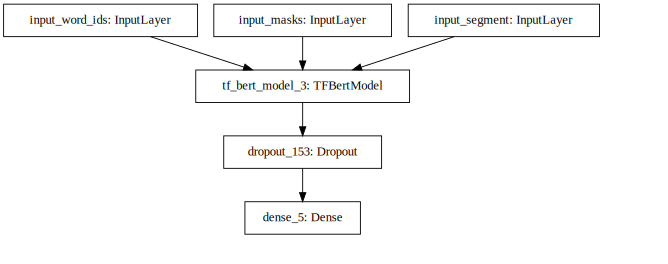

In [ ]:
from IPython.display import SVG
from keras.utils import model_to_dot


SVG(model_to_dot(sentiment_model, dpi=65).create(prog='dot', format='svg'))



## 훈련 및 성능 검증

In [ ]:
 tokens, masks, segments, targets = [], [], [], []
 SEQ_LEN = 128
 for i in test_text:
        # token : 문장을 토큰화함
        # if len(i) > 256: 이게 있어서 8000개만 추출된듯 
        i = i[:128]
        token = tokenizer.encode(i, max_length=SEQ_LEN, pad_to_max_length=True,truncation = True)
      
        # 마스크는 토큰화한 문장에서 패딩이 아닌 부분은 1, 패딩인 부분은 0으로 통일
        num_zeros = token.count(0)
        mask = [1]*(SEQ_LEN-num_zeros) + [0]*num_zeros
        
        # 문장의 전후관계를 구분해주는 세그먼트는 문장이 1개밖에 없으므로 모두 0
        segment = [0]*SEQ_LEN

        # 버트 인풋으로 들어가는 token, mask, segment를 tokens, segments에 각각 저장
        tokens.append(token)
        masks.append(mask)
        segments.append(segment)

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:1773: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
tokens = pad_sequences(tokens, value = 0, padding = 'post')
masks = np.array(masks)
segments = np.array(segments)
test_X = tokens, masks, segments

In [ ]:
test_X

(array([[   2,    0, 7420, ...,    0,    0,    3],
        [   2,    0,    0, ...,    1,    1,    1],
        [   2,    0,    0, ...,    1,    1,    1],
        ...,
        [   2, 7827, 7420, ...,    1,    1,    1],
        [   2,    0,    0, ...,    1,    1,    1],
        [   2,    0,    0, ...,    1,    1,    1]], dtype=int32),
 array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]))

In [ ]:
print(len(test_senti))
print(len(test_X[1]))

2221
2221


In [ ]:
# targets = []
# for i in df_test['Label']:
#   targets.append(i)

# targets = np.array(targets)
# test_y = targets

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = 'val_loss', patience = 3)


In [ ]:
print(len(train_X[1][1]))
print(len(test_X[1][1]))

128
128


In [ ]:
# train_senti = np.asarray(train_senti).astype(np.int32)
# test_senti = np.asarray(test_senti).astype(np.int32)

In [ ]:
train_X

(array([[   2,    0, 7823, ...,    1,    1,    1],
        [   2,    0, 7824, ...,    1,    1,    1],
        [   2,    0,    0, ...,    1,    1,    1],
        ...,
        [   2,    0,    0, ...,    1,    1,    1],
        [   2,    0,    0, ...,    1,    1,    1],
        [   2, 5581,    0, ...,    1,    1,    1]], dtype=int32),
 array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]))

In [ ]:
sentiment_model.fit(train_X, 
                    train_senti, 
                    epochs=100, # epoch를 조금 더 높여서 해보기 
                    shuffle=True, 
                    batch_size=64, 
                    validation_data = (test_X, test_senti), 
                    callbacks = [es])

Epoch 1/100
81/81 [==============================] - 92s 1s/step - loss: 1.9415 - accuracy: 0.1905 - val_loss: 1.9095 - val_accuracy: 0.2364
Epoch 2/100
81/81 [==============================] - 85s 1s/step - loss: 1.9101 - accuracy: 0.2260 - val_loss: 1.9033 - val_accuracy: 0.2386
Epoch 3/100
81/81 [==============================] - 85s 1s/step - loss: 1.9067 - accuracy: 0.2335 - val_loss: 1.8968 - val_accuracy: 0.2386
Epoch 4/100
81/81 [==============================] - 85s 1s/step - loss: 1.9053 - accuracy: 0.2334 - val_loss: 1.9211 - val_accuracy: 0.2386
Epoch 5/100
81/81 [==============================] - 85s 1s/step - loss: 1.9108 - accuracy: 0.2268 - val_loss: 1.9199 - val_accuracy: 0.2386
Epoch 6/100
81/81 [==============================] - 85s 1s/step - loss: 1.9221 - accuracy: 0.2364 - val_loss: 1.9192 - val_accuracy: 0.2386


훈련 모델의 예측 성능을 F1 SCORE로 체크하기 위한 작업

In [ ]:
def predict_convert_data(data_df):
    global tokenizer
    tokens, masks, segments = [], [], []
    
    for i in tqdm(range(len(data_df))):

        token = tokenizer.encode(data_df, max_length=SEQ_LEN, pad_to_max_length=True)
        num_zeros = token.count(0)
        mask = [1]*(SEQ_LEN-num_zeros) + [0]*num_zeros
        segment = [0]*SEQ_LEN

        tokens.append(token)
        segments.append(segment)
        masks.append(mask)

    tokens = np.array(tokens)
    masks = np.array(masks)
    segments = np.array(segments)
    return [tokens, masks, segments]

# 위에 정의한 convert_data 함수를 불러오는 함수를 정의
def predict_load_data(pandas_dataframe):
    data_df = pandas_dataframe
    data_df[DATA_COLUMN] = data_df[DATA_COLUMN].astype(str)
    data_x = predict_convert_data(data_df)
    return data_x

test 데이터 예측하기

In [ ]:
preds = sentiment_model.predict(test_X)

In [ ]:
# 부정이면 0, 긍정이면 1 출력
preds

In [ ]:
from sklearn.metrics import classification_report
y_true = test_senti
# F1 Score 확인
print(classification_report(y_true, np.round(preds,0)))

In [ ]:
import logging
tf.get_logger().setLevel(logging.ERROR)

In [ ]:
test_X

In [ ]:
test_senti

In [ ]:
def sentence_convert_data(data):
    global tokenizer
    tokens, masks, segments = [], [], []

    data = text_tokenizing(text_cleaning(data)) # 이거

    token = tokenizer.encode(data, max_length=SEQ_LEN, pad_to_max_length=True)
    
    num_zeros = token.count(0) 
    mask = [1]*(SEQ_LEN-num_zeros) + [0]*num_zeros 
    segment = [0]*SEQ_LEN

    tokens.append(token)
    segments.append(segment)
    masks.append(mask)

    tokens = np.array(tokens)
    masks = np.array(masks)
    segments = np.array(segments)
    return [tokens, masks, segments]

def child_evaluation_predict(sentence):
    data_x = sentence_convert_data(sentence)
    predict = sentiment_model.predict(data_x)
    predict_value = np.ravel(predict)
 

    categories = ['해당없음', '아동기준 학대 심각성 및 지속성', '피해아동 특성','생활 환경','학대자기준 학대 심각성 및 지속성','학대 인식', '학대 행위자 특성']

    N = len(categories)

    values = np.round(predict, 3).flatten().tolist()
    values += values[:1]

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    plt.polar(angles, values)
    plt.fill(angles, values, alpha = 10.0)
    plt.xticks(angles[:-1], categories)

    plt.yticks([0,0.25,0.5,0.75,1.0])
    plt.ylim(0,1)
    
    plt.show()
    
    
    

In [ ]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# from math import pi
# f = plt.figure(figsize=(10,5))
# categories=['consistency', 'correctness', 'completeness']
# N = len(categories)
# values=[59,80,60]
# values += values[:1]
# values
# angles = [n / float(N) * 2 * pi for n in range(N)]
# angles += angles[:1]
# ax = f.add_subplot(111, polar=True)
# plt.xticks(angles[:-1], categories, color='grey', size=8)
# ax.set_rlabel_position(180)
# plt.yticks([20,40,60,80,100], ["20","40","60","80","100"], color="grey", size=10)
# plt.ylim(0,100)
# ax.plot(angles, values, 'o-', linewidth=1, linestyle='solid')
# ax.fill(angles, values, 'b', alpha=0.1)

In [ ]:
child_evaluation_predict("오늘 엄마랑 아빠랑 놀이동산에 놀러갔다. 추러스도 먹고 맛있는 핫도그도 먹고 재밌는 롤러코스터도 많이 탔다. 집에 돌아오는길에 차에서 토했는데 엄마랑 아빠가 왜그러냐며 뭐라하셨다. 속상했다")

In [ ]:
child_evaluation_predict("3일째 부모님이 술마시느라 집에 안들어오고 있고 전화를 해도 안받아요. 집에 먹을게 없어요... 라면을 어떻게 끓이는 건가요")

In [ ]:
child_evaluation_predict("엄마가 용돈을 안주고 돈도 없고 우울하네요 가출을 할까요?")

In [ ]:
child_evaluation_predict("오늘 집에 늦게 들어갔는데 아빠가 시발새끼라고 했어요")

In [ ]:
child_evaluation_predict("그래서 뒤를 돌아봤는데 알고보니 제가 아니라 옆집아저씨한테 하는 말이었어요. 다행이에요. ")

In [ ]:
child_evaluation_predict("동네아저씨들이 욕을 하면서 서로 싸우고 있는 걸보면서 지나갔는데 알고 봤더니 아빠가 나한테 욕을 하고 있었어요.")

In [ ]:
child_evaluation_predict("아빠 지갑에서 삼만원을 훔쳤는데.. 걸리자마자 속옷차림으로 쫓겨났어요.. 저 어디가야하죠?")